# Konvertering fra .shp til .geojson kartfiler

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm import tqdm
from menon.styles.notebook import set_styles
set_styles()

In [2]:
from os import listdir, scandir
from os.path import isfile, join, isdir

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_446/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
# Gjør slik at tabellene som printes er fullstendige
pd.set_option('display.max_columns',100)
pd.set_option("display.max_rows",300)

In [5]:
import geopandas as gpd
from shapely.geometry import Polygon
import shapely.wkt as wkt
from shapely.geometry import MultiPolygon
from shapely.geometry import LineString
from shapely.geometry import shape
from shapely.geometry import Point
from shapely.geometry import MultiPoint

In [6]:
import os
os.getcwd()

'/home/lars_m_h/oci_lars_m_h/git/public-assets/Kode'

## Filbaner

In [7]:
LMH = 1
annen_bruker = 0

if (LMH == 1) & (annen_bruker==0): 
    path_user = "lars_m_h"
if (LMH == 0) & (annen_bruker==1):
    path_user = "INSERT BRUKERNAVN ANNEN BRUKER"
    
path_system = Path(r"/home/")
path_user = Path(path_user)
path_project = Path(r"oci_lars_m_h/git/public-assets")
path_input = Path(r"Kode/Rådata")
path_arkiv = Path(r"Arkiv")

In [8]:
path_input_files = path_system / path_user / path_project / path_input
path_input_files

PosixPath('/home/lars_m_h/oci_lars_m_h/git/public-assets/Kode/Rådata')

In [9]:
path_output_files = path_system / path_user / path_project 
path_output_files

PosixPath('/home/lars_m_h/oci_lars_m_h/git/public-assets')

In [10]:
path_old_files = path_system / path_user / path_project / path_arkiv
path_old_files

PosixPath('/home/lars_m_h/oci_lars_m_h/git/public-assets/Arkiv')

## Laster inn gamle kartfiler og sjekker innhold og variabelnavn

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   kommunenummer  428 non-null    int64   
 1   navn           428 non-null    object  
 2   geometry       428 non-null    geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 10.2+ KB
kommuner.geojson ['kommunenummer', 'navn', 'geometry'] epsg:4326 None
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   fylkesnummer  18 non-null     int64   
 1   navn          18 non-null     object  
 2   geometry      18 non-null     geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 560.0+ bytes
fylker.geojson ['fylkesnummer', 'navn', 'geometry'] epsg:4326 None


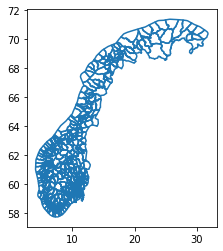

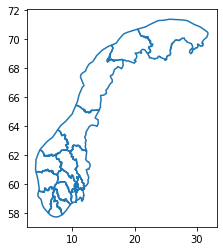

In [31]:
file_type = ".geojson"
old_files = [f for f in listdir(path_old_files) if isfile(join(path_old_files, f)) and file_type in f]

for fil in old_files: 
    enkeltfil = gpd.read_file(path_old_files / fil)
    kolonner = enkeltfil.columns.tolist()
    crs = enkeltfil.crs
    print(fil,kolonner,crs,enkeltfil.info())
    enkeltfil.boundary.plot()

## Laster inn nye kartfiler og sjekker innhold og variabelnavn

Grunnkretser 2020.shp ['objtype', 'grunnkrets', 'grunnkre_1', 'geometry'] PROJCS["UTM_Zone_33_Northern_Hemisphere",GEOGCS["GCS_GRS 1980(IUGG, 1980)",DATUM["D_unknown",SPHEROID["GRS80",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Kommunegrenser 2021 FASTLANDSNORGE.shp ['objtype', 'kommunenum', 'samiskforv', 'navnerom', 'versjonid', 'objid', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'] epsg:25833
Fylkesgrenser_2020_epsg_25833.shp ['fylkesnumm', 'geometry'] epsg:25833
Postnummerområder 2021 FASTLANDSNORGE.shp ['objid', 'objtype', 'postnummer', 'poststed', 'lokalid', 'navnerom', 'versjonid', 'datauttaks', 'oppdaterin', 'opphav', 'noyaktighe', 'kommune', 'malemetode', 'SHAPE_Leng',

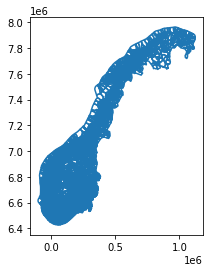

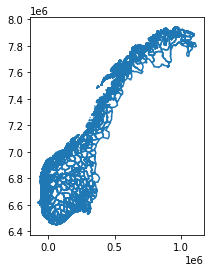

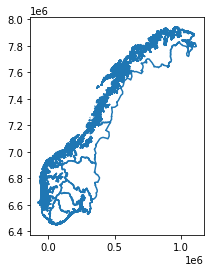

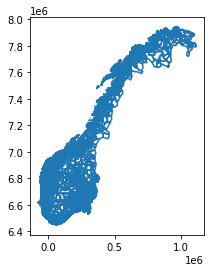

In [12]:
path_input_subdirectories = [f.path for f in scandir(path_input_files) if f.is_dir()]
file_type = ".shp"
path_input_subdirectories = [mappe for mappe in path_input_subdirectories if ".ipynb_checkpoints" not in mappe]

for i in range(0,len(path_input_subdirectories)):
    file_path = Path(path_input_subdirectories[i])
    file = [f for f in listdir(file_path) if isfile(join(file_path, f)) and file_type in f][0]
    enkeltfil = gpd.read_file(file_path / file)
    kolonner = enkeltfil.columns.tolist()
    crs = enkeltfil.crs
    print(file,kolonner,crs)
    enkeltfil.boundary.plot()

## Fikser innhold i grunnkrets-datasett for å kun inkludere fastlands-Norge

In [13]:
path_grunnkrets = Path(r'/home/lars_m_h/oci_lars_m_h/git/public-assets/Kode/Rådata/Grunnkretser 2020')
grunnkretser = gpd.read_file(path_grunnkrets / "Grunnkretser 2020.shp")
grunnkretser = grunnkretser.to_crs(crs=25833)

path_komm_fastland = Path(r'/home/lars_m_h/oci_lars_m_h/git/public-assets/Kode/Rådata/Kommunegrenser 2021')
kommuner_fastland = gpd.read_file(path_komm_fastland / "Kommunegrenser 2021 FASTLANDSNORGE.shp")
fastlandsnorge = kommuner_fastland[["geometry"]].assign(felles = 0).dissolve(by="felles")

<AxesSubplot:>

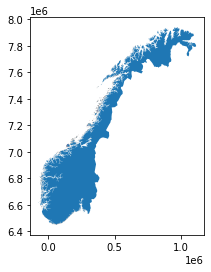

In [14]:
fastlandsnorge.plot()

<AxesSubplot:>

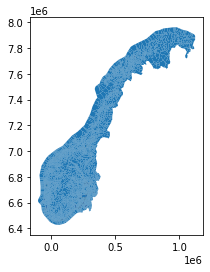

In [15]:
grunnkretser.plot()

In [17]:
grunnkretser_fastland = gpd.overlay(df1=grunnkretser,df2=fastlandsnorge,how="intersection")

/tmp/ipykernel_446/998011465.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  grunnkretser_fastland = gpd.overlay(df1=grunnkretser,df2=fastlandsnorge,how="intersection")


<AxesSubplot:>

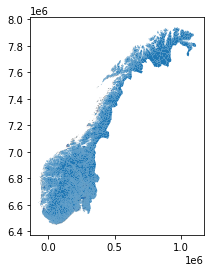

In [20]:
grunnkretser_fastland.plot()

In [ ]:
Grunnkretser 2020.shp ['objtype', 'grunnkrets', 'grunnkre_1', 'geometry'] PROJCS["UTM_Zone_33_Northern_Hemisphere",GEOGCS["GCS_GRS 1980(IUGG, 1980)",DATUM["D_unknown",SPHEROID["GRS80",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Kommunegrenser 2021 FASTLANDSNORGE.shp ['objtype', 'kommunenum', 'samiskforv', 'navnerom', 'versjonid', 'objid', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'] epsg:25833
Fylkesgrenser_2020_epsg_25833.shp ['fylkesnumm', 'geometry'] epsg:25833
Postnummerområder 2021 FASTLANDSNORGE.shp ['objid', 'objtype', 'postnummer', 'poststed', 'lokalid', 'navnerom', 'versjonid', 'datauttaks', 'oppdaterin', 'opphav', 'noyaktighe', 'kommune', 'malemetode', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'] epsg:25833

## Laster inn data, inkluderer relevante variabler og lagrer som geojson

In [23]:
vars_to_keep = ['grunnkrets', 'grunnkre_1', 'geometry']
dict_rename = dict(zip(vars_to_keep,['grunnkrets', 'navn', 'geometry']))
grunnkretser_fastland = grunnkretser_fastland[vars_to_keep].rename(columns=dict_rename)

In [127]:
path_navn = Path(r"/home/lars_m_h/menon_database/regnskapsdatabasen/oppdatering_januar2022")
navn = pd.read_parquet(path_navn / "tidsserie_fylkesnr_kommnr_og_postnr_med_kobling_mot_2020_kommnr.parquet.gzip")
kommnavn = navn.loc[lambda df: df.aar==2020][["Kommunenummer_2020","Kommunenavn_2020"]].drop_duplicates().rename(columns={"Kommunenummer_2020":"kommunenummer","Kommunenavn_2020":"navn"})
fylkesnavn = navn.loc[lambda df: df.aar==2020][["Fylkesnummer_2020","Årlig_fylkesnavn"]].drop_duplicates().rename(columns={"Fylkesnummer_2020":"fylkesnummer","Årlig_fylkesnavn":"navn"})

dict_bibliotek = {"Kommunegrenser 2021 FASTLANDSNORGE.shp":{"variabler":['kommunenum','geometry'],
                                                               "dict_rename":dict(zip(['kommunenum','geometry'],['kommunenummer','geometry'])),
                                                               "astype":{"kommunenummer":int}
                                                              },
                     "Fylkesgrenser_2020_epsg_25833.shp":{"variabler":['fylkesnumm', 'geometry'],
                                                          "dict_rename":dict(zip(['fylkesnumm', 'geometry'],['fylkesnummer', 'geometry'])),
                                                          "astype":{"fylkesnummer":int}
                                                         },
                     "Postnummerområder 2021 FASTLANDSNORGE.shp":{"variabler":['postnummer', 'poststed','kommune','geometry'],
                                                                  "dict_rename":dict(zip(['postnummer', 'poststed','kommune','geometry'],['postnummer', 'navn','kommunenummer','geometry'])),
                                                                  "astype":{"postnummer":int,"kommunenummer":int}
                                                                 }
                    }

path_input_subdirectories = [f.path for f in scandir(path_input_files) if f.is_dir()]
file_type = ".shp"
path_input_subdirectories = [mappe for mappe in path_input_subdirectories if ".ipynb_checkpoints" not in mappe and "Grunnkretser" not in mappe] #grunnkretser fikset vi over - laster ikke inn denne her.

for path in path_input_subdirectories:
    file_path = Path(path)
    file = [f for f in listdir(file_path) if isfile(join(file_path, f)) and file_type in f][0]
    
    relevant_dict = dict_bibliotek[file]
    variabler = relevant_dict["variabler"]
    dict_rename = relevant_dict["dict_rename"]
    astype = relevant_dict["astype"]
    
    file_to_convert = gpd.read_file(file_path / file)
    
    file_to_convert = file_to_convert[variabler].rename(columns=dict_rename).astype(dtype=astype)
    
    if file == "Kommunegrenser 2021 FASTLANDSNORGE.shp":
        file_to_convert = file_to_convert.merge(kommnavn,on="kommunenummer",how="left",validate="1:1")
    
    if file == "Fylkesgrenser_2020_epsg_25833.shp":
        file_to_convert = file_to_convert.merge(fylkesnavn,on="fylkesnummer",how="left",validate="1:1")
    
    crs = file_to_convert.crs.srs.replace(":","_")
    if "epsg" in file:
        filename = file[0:-4] + ".geojson"
    if "epsg" not in file:
        filename = file[0:-4] + " " + crs + ".geojson"
    filename = filename.replace(" ","_")
    file_to_convert.to_file(path_output_files / filename,driver='GeoJSON')

/opt/python/venv/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/opt/python/venv/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/opt/python/venv/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [131]:
grunnkretser_fastland.to_file(path_output_files / "Grunnkretser_2020_FASTLANDSNORGE_epsg_25833.geojson",driver='GeoJSON')

/opt/python/venv/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
